In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows',150)
pd.set_option('display.max_columns',150)

### 1.0 Reading the application_data.csv file and intial Rubbings

In [3]:
### Reading the application_data.csv file 
appl_data = pd.read_csv("application_data.csv")
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [55]:
### shape of the dataframe is 122 columns and 307511 rows
appl_data.shape

(307511, 122)

In [386]:
### attributes of the appl_data dataframe with its datatype
appl_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 77 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [178]:
### identify the columns that have null values in it
appl_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

#### 1.1 49 columns have approximately more than 50% of null values, hence dropping them

In [4]:
## dropping the 49 columns that have more than 50% of null values
appl_data.drop(columns =['OWN_CAR_AGE','EXT_SOURCE_1','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','LANDAREA_AVG','LIVINGAREA_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','LANDAREA_MODE','LIVINGAREA_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','LANDAREA_MEDI','LIVINGAREA_MEDI','NONLIVINGAREA_MEDI','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','YEARS_BUILD_AVG','COMMONAREA_AVG','FLOORSMIN_AVG','LIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_AVG','YEARS_BUILD_MODE','COMMONAREA_MODE','FLOORSMIN_MODE','LIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_MODE','YEARS_BUILD_MEDI','COMMONAREA_MEDI','FLOORSMIN_MEDI','LIVINGAPARTMENTS_MEDI','NONLIVINGAPARTMENTS_MEDI','FONDKAPREMONT_MODE'], axis = 1,inplace=True)

In [58]:
## re-running the null values count on the dataframe
appl_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [59]:
## shape of the dataframe is now with 73 columns (49 removed) and 307511 rows are still intact
appl_data.shape

(307511, 73)

#### 1.2 Impute methedology for the lower count of missing values

##### Picking 5 columns for imputation
    - AMT_ANNUITY
    - CNT_FAM_MEMBERS
    - DAYS_LAST_PHONE_CHANGE
    - EXT_SOURCE_2
    - NAME_TYPE_SUITE

###### a) Imputing AMT_ANNUITY

In [5]:
# Impute the AMT_ANNUITY column based on the mean percentage of the annuity based on the total income
appl_data[appl_data.AMT_ANNUITY.isnull()]
appl_data['percent'] = appl_data.AMT_ANNUITY/appl_data.AMT_INCOME_TOTAL
appl_data.percent.describe()

count    307499.000000
mean          0.180930
std           0.094574
min           0.000224
25%           0.114782
50%           0.162833
75%           0.229067
max           1.875965
Name: percent, dtype: float64

In [ ]:
# the AMT_ANNUITY can be imputed with 18% (mean value of percentage contribution towards annuity from the salary) 
# for the missing records

### commenting out the below statement as only the procedure to impute the column is needed

# appl_data.AMT_ANNUITY = appl_data.AMT_ANNUITY.apply(lambda x: (appl_data.AMT_INCOME_TOTAL*appl_data.percent) if appl_data.AMT_ANNUITY is None else appl_data.AMT_ANNUITY)

##### b) Imputing CNT_FAM_MEMBERS

In [376]:
#imputing the CNT_FAM_MEMBERS for the records that are NULL  to 1 (as the count of children is 0 and no mention of dependents)

### commenting out the below statement as only the procedure to impute the column is needed
#appl_data.loc[appl_data.CNT_FAM_MEMBERS.isnull(),'CNT_FAM_MEMBERS'] = 1

##### c) Imputing DAYS_LAST_PHONE_CHANGE

In [180]:
### the column DAYS_LAST_PHONE_CHANGE is null as the FLAG_MOBIL = 0, the client has not provided the mobile. 
appl_data.loc[appl_data.DAYS_LAST_PHONE_CHANGE.isnull(),['FLAG_MOBIL','DAYS_LAST_PHONE_CHANGE']]
appl_data.DAYS_LAST_PHONE_CHANGE.describe()

### commenting out the below statement as only the procedure to impute the column is needed
## Since only one such records is there, it can be imputed with mean value of the column DAYS_LAST_PHONE_CHANGE

# appl_data.loc[appl_data.DAYS_LAST_PHONE_CHANGE.isnull(),'DAYS_LAST_PHONE_CHANGE'] = -962

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

##### d) Imputing EXT_SOURCE_2

In [77]:
## Normalized score from external data source --> since the EXT_SOURCE_2 is having lowest number missing values, 
## the missing values for EXT_SOURCE_2 be imputed EXT_SOURCE_3 wherever it is available. 
## (EXT_SOURCE_1 is removed since the missing values are more than 50%)

### commenting out the below statement as only the procedure to impute the column is needed
# appl_data.loc[appl_data.EXT_SOURCE_2.isnull(),'EXT_SOURCE_2'] = appl_data['EXT_SOURCE_3']

##### e) Imputing NAME_TYPE_SUITE

In [87]:
## The column NAME_TYPE_SUITE can be imputed with mode value (highest occuring value) "Unaccompanied"

appl_data.NAME_TYPE_SUITE.value_counts()
### commenting out the below statement as only the procedure to impute the column is needed

## imputing the column with "Unaccompanied" value for the missing values
#appl_data.loc[(appl_data.NAME_TYPE_SUITE.isnull()),'NAME_TYPE_SUITE']  = 'Unaccompanied'

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

##### 1.3 Identifying the outliers on few selected attributes

###### 1.3.1 DEF_60_CNT_SOCIAL_CIRCLE attribute

In [327]:
#decribing the attribute to check the spread of data
appl_data['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

Inference: we see that it has many outliers max is 24.0, mean is 0.10, this implie there is lot variation in column values and many outliers on high end.

###### 1.3.2 DAYS_LAST_PHONE_CHANGE attribute

In [331]:
appl_data['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

###### Inference : 
    min is 4292 and max is 0 
    min to 25% difference of around 2800 
    25% to 50% difference of around 800 
    50% to 75% difference of around 500

    Many outlier in the lower end than higher end with reference to cell DAYS_LAST_PHONE_CHANGE

##### 1.4 Casting the datatype to the right datatype
    CNT_FAM_MEMBERS : float to int as there can not be fractional numbers in the family members
    DAYS_REGISTRATION : float to int as the days can not be fractional

In [383]:
appl_data.CNT_FAM_MEMBERS = appl_data.CNT_FAM_MEMBERS.astype('int')

In [385]:
appl_data.DAYS_REGISTRATION = appl_data.DAYS_REGISTRATION.astype('int')

### 2.0 Categorical and Continuous attributes

In [ ]:
appl_data.nunique().sort_values()

#### few of the categorical columns:

    LIVE_CITY_NOT_WORK_CITY              2
    FLAG_MOBIL                           2
    CODE_GENDER                          3
    HOUSETYPE_MODE                       3
    FONDKAPREMONT_MODE                   4
    NAME_EDUCATION_TYPE                  5
    NAME_FAMILY_STATUS                   6
    NAME_HOUSING_TYPE                    6
    NAME_TYPE_SUITE                      7
    NAME_INCOME_TYPE                     8

#### few of the continuous columns:

    AMT_INCOME_TOTAL                  2548
    AMT_GOODS_PRICE                   1002
    AMT_ANNUITY                      13672
    DAYS_REGISTRATION                15688
    DAYS_BIRTH                       17460
    AMT_CREDIT                        5603
    DAYS_ID_PUBLISH                   6168
    DAYS_EMPLOYED                    12574

### 2.1 Converting the continuous columns into categorical columns (BINNING)

##### Picking few columns such as below to convert them to categorical columns
    - AMT_INCOME_TOTAL  --> INCOME_CAT
    - DAYS_BIRTH        --> AGE_GROUP
    - DAYS_EMPLOYED     --> EXPERIENCE_LEVEL

##### a) Converting AMT_INCOME_TOTAL to INCOME_CAT 

In [179]:
## AMT_INCOME_TOTAL --> the salary is bucketed to very low, low, medium,average, high, very high buckets 
appl_data.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [6]:
appl_data['INCOME_CAT'] = pd.cut(appl_data.AMT_INCOME_TOTAL,[25000,50000,125000,175000,250000,325000,120000000],labels=['very low','low','average','above average','high','very high'])

In [104]:
appl_data.INCOME_CAT.value_counts()

low              102882
average           82553
above average     77781
high              23791
very high         15987
very low           4517
Name: INCOME_CAT, dtype: int64

##### b) Convering DAYS_BIRTH into AGE_GROUP

In [103]:
appl_data.DAYS_BIRTH.describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [7]:
## creating the new column by name AGE_GROUP which will have categories from 0-15, 16-30, 31-45,46-60,61-above
appl_data['AGE_GROUP'] = pd.cut(appl_data.DAYS_BIRTH,[-36000,-21900,-16425,-10950,-5475,0],labels=['61-above','46-60','31-45','16-30','0-15'])

In [101]:
# the AGE_GROUP now has the categorical values 
appl_data.AGE_GROUP.value_counts()

31-45       123715
46-60       103201
16-30        45000
61-above     35595
0-15             0
Name: AGE_GROUP, dtype: int64

##### c) Converting the DAYS_EMPLOYED to EXPERIENCE_LEVEL

In [137]:
## there are records with invalid DAYS_EMPLOYED ( the days can not be 365243) , hence marking them to not-employed
appl_data.loc[(appl_data.DAYS_EMPLOYED < 0 ),'DAYS_EMPLOYED'].describe()

count    252135.000000
mean      -2384.188236
std        2338.359795
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max          -1.000000
Name: DAYS_EMPLOYED, dtype: float64

In [8]:
## creating the new column by name AGE_GROUP which will have categories from Not-employed,0-10, 11-20, 21-30,31-40, 41-50
appl_data['EXPERIENCE_LEVEL'] = pd.cut(appl_data.DAYS_EMPLOYED,[-18250,-14600,-10950,-7300,-3650,0,365243],labels=['41-50','31-40','21-30','11-20','0-10','not-employed'])

In [134]:
appl_data.EXPERIENCE_LEVEL.value_counts()

0-10            201157
not-employed     55374
11-20            38422
21-30             9552
31-40             2772
41-50              234
Name: EXPERIENCE_LEVEL, dtype: int64

###### d) Few more attributes

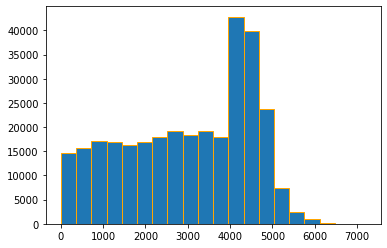

In [332]:
plt.hist(appl_data['DAYS_ID_PUBLISH'].abs(), edgecolor ='orange', bins= 20)
plt.show()

                Observation : Highest frequency is in between 4000 to 5000 Days

### 3.0 Analysis of the application_data.csv file data

In [140]:
## checking the balance of the data 
appl_data.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

#### 3.1 The data is imbalanced 
    91.9% of the data is pointing that the customer is not having difficulty in repayment of the loan 
    8.07% of the customer is having difficulty in the repayment of the loan

In [352]:
## Picking around 25 columns for the further analysis ( combination of categorical and continuous attributes)
df = appl_data[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OCCUPATION_TYPE','ORGANIZATION_TYPE','EXT_SOURCE_2','INCOME_CAT','AGE_GROUP','EXPERIENCE_LEVEL']]

#### 3.2 Splitting the dataframe based on the TARGET column value (1 & 0)

In [353]:
## splitting the data into 2 parts wrt to the TARGET column having 1 or 0
df1 = df[df.TARGET == 1]   ## shape (24825, 24)
df0 = df[df.TARGET == 0]   ## shape (282686, 24)

#### 3.3 Univariate analysis on the Continuous value attributes

##### a) Univariate Analysis on DAYS_BIRTH ( continuous column)

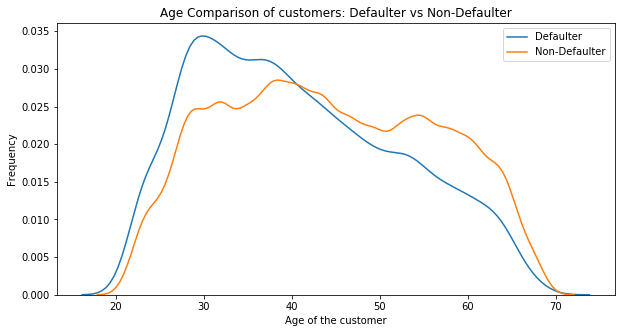

In [28]:
plt.figure(figsize=[10,5])
ax=sns.distplot(abs(round(df1["DAYS_BIRTH"]/365,0)),hist=False,label = 'Defaulter')
ax=sns.distplot(abs(round(df0["DAYS_BIRTH"]/365,0)),hist=False,label = 'Non-Defaulter')
ax.set(xlabel='Age of the customer', ylabel='Frequency',title='Age Comparison of customers: Defaulter vs Non-Defaulter')
plt.show()

##### Conclusion on the above Univarirate analysis on DAYS_BIRTH:
    1) The Defaulter is high at the age of 28-32 years of age.
    2) Non defaulter is covering a wide range of age from 25-65 years

##### b) Univariate Analysis on AMT_INCOME_TOTAL ( continuous column)

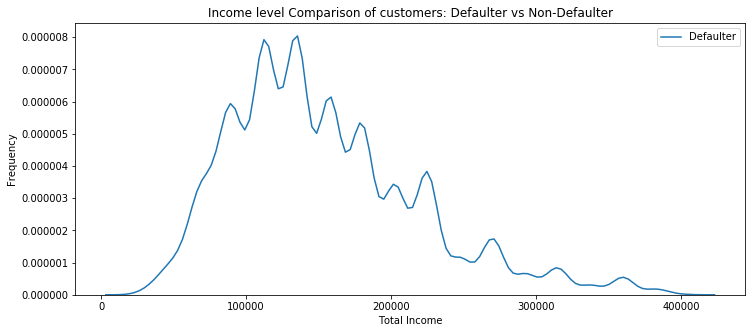

In [335]:
## removing outliers and picking the data upto 99% quantile for proper comparison of the data
plt.figure(figsize=[12,5])
ax=sns.distplot(df1[df1.AMT_INCOME_TOTAL < df1.AMT_INCOME_TOTAL.quantile(0.99)].AMT_INCOME_TOTAL,hist=False,label = 'Defaulter')
#ax=sns.distplot(df0[df0.AMT_INCOME_TOTAL < df0.AMT_INCOME_TOTAL.quantile(0.95)].AMT_INCOME_TOTAL,hist=False,label = 'Non-Defaulter')
ax.set(xlabel='Total Income', ylabel='Frequency',title='Income level Comparison of customers: Defaulter vs Non-Defaulter')
plt.show()

##### Conclusion on the above Univarirate analysis on AMT_INCOME_TOTAL:
    1) Defaulting customers have 2 income range where there is high defaulters : 110,000 and 130,000
    2) Though the datapoints for higher income are less, we can conclude that higher the income, lower the chances of having difficulty in repaying

##### c) Univariate Analysis on DAYS_EMPLOYED ( continuous column)

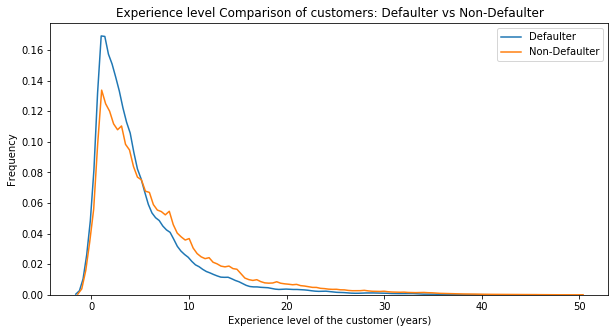

In [214]:
## picking only the records with DAYS_EMPLOYED who are employed and removing the customers who are not employed (DAYS_EMPLOYED < 0)
plt.figure(figsize=[10,5])
ax=sns.distplot(abs(round(df1[df1["DAYS_EMPLOYED"]< 0]["DAYS_EMPLOYED"]/365,0)),hist=False,label = 'Defaulter')
ax=sns.distplot(abs(round(df0[df0["DAYS_EMPLOYED"]< 0]["DAYS_EMPLOYED"]/365,0)),hist=False,label = 'Non-Defaulter')
ax.set(xlabel='Experience level of the customer (years)', ylabel='Frequency',title='Experience level Comparison of customers: Defaulter vs Non-Defaulter')
plt.show()

##### Conclusion on the above Univarirate analysis on DAYS_EMPLOYED:
    1) The customers with experience level of 2-5 years are the ones with high defaulting group
    2) Since the volume of data more skewed towards the upto 10 years of experience, not much can be concluded on the customers with higher experience level 

##### 3.4 Univariate analysis on the Categorical attributes

##### a) Performing the Univariate analysis on OCCUPATION_TYPE

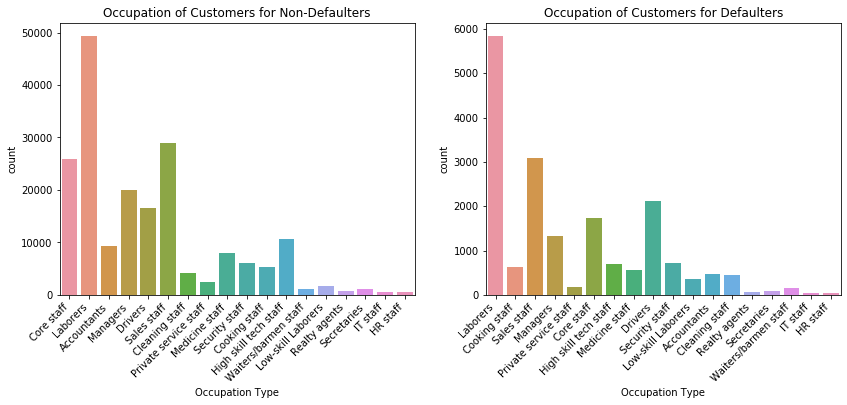

In [66]:
### univariate analysis
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
plt.title("Occupation of Customers for Non-Defaulters")
chart = sns.countplot(df0['OCCUPATION_TYPE'], label = 'Defaulter')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel("Occupation Type")
plt.subplot(1,2,2)
plt.title("Occupation of Customers for Defaulters")
chart = sns.countplot(df1['OCCUPATION_TYPE'], label = 'Non-Defaulter')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel("Occupation Type")
plt.show()

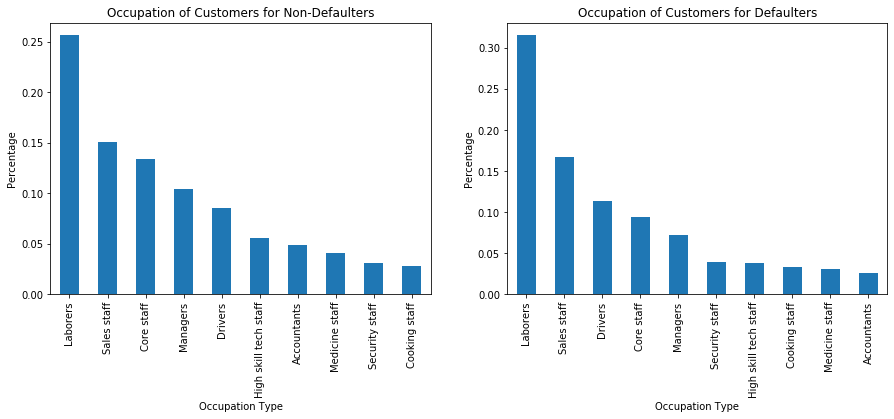

In [103]:
## building graph for the same attribute OCCUPATION_TYPE, but with the % of distribution to get the different perspective
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title("Occupation of Customers for Non-Defaulters")
df0['OCCUPATION_TYPE'].value_counts(normalize=True).head(10).plot(kind='bar')
plt.xlabel("Occupation Type")
plt.ylabel("Percentage")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.subplot(1,2,2)
plt.title("Occupation of Customers for Defaulters")
df1['OCCUPATION_TYPE'].value_counts(normalize=True).head(10).plot(kind='bar')
plt.xlabel("Occupation Type")
plt.ylabel("Percentage")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

##### Conclusion on above univariate analysis on OCCUPATION_TYPE ( using count and percentage)
    1) From the above graph, the most of the defaulters are Laborers. But the same is true for the Non-defaulters. 
    2) Laborers constitute > 30% in the overall defaulters. and more than 50% of the total defaulters are Laborers and Sales Staff

#### 3.5 Bivariate analysis 

##### 3.5.1 Bivariate Analysis : Categorical  Vs Categorical attributes

    Occupation_Type Vs Gender spread

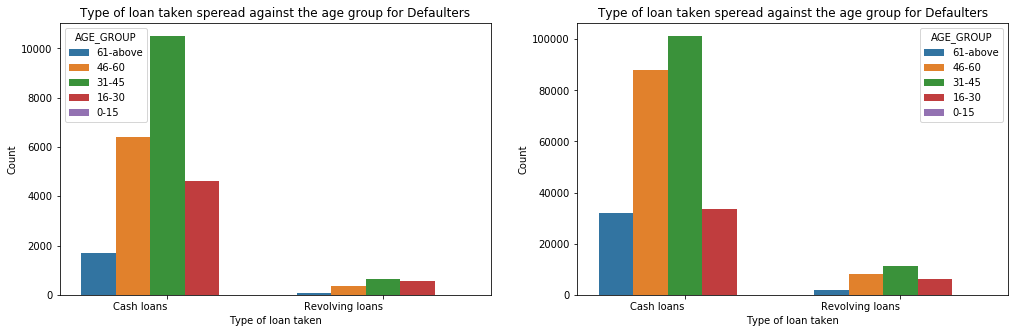

In [243]:
plt.figure(figsize = (17,5))
plt.subplot(1,2,1)
plt.title("Type of loan taken speread against the age group for Defaulters")
chart = sns.countplot(x="NAME_CONTRACT_TYPE", hue="AGE_GROUP", data=df1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.xlabel("Type of loan taken")
plt.ylabel("Count")
plt.subplot(1,2,2)
plt.title("Type of loan taken speread against the age group for Defaulters")
chart = sns.countplot(x="NAME_CONTRACT_TYPE", hue="AGE_GROUP", data=df0)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.xlabel("Type of loan taken")
plt.ylabel("Count")
plt.show()

##### Conclusion based on the above graph
    1) Cash loan type is very popular among the 31-45 years age group but at the same time the same age group has defaulted maximum number of times
    2) The age group 46-60 are having best suited for repayment. There are around 90k loan subscriptions but only ~6k defaulters where as in the age group of 31-45 there are 100k subscribers but ~11k defaulters

##### 3.5.2 Bivariate analysis on the Continuous Vs Categorical attributes
    EXPERIENCE_LEVEL Vs AMT_INCOME_TOTAL
    EXPERIENCE_LEVEL Vs AMT_CREDIT   

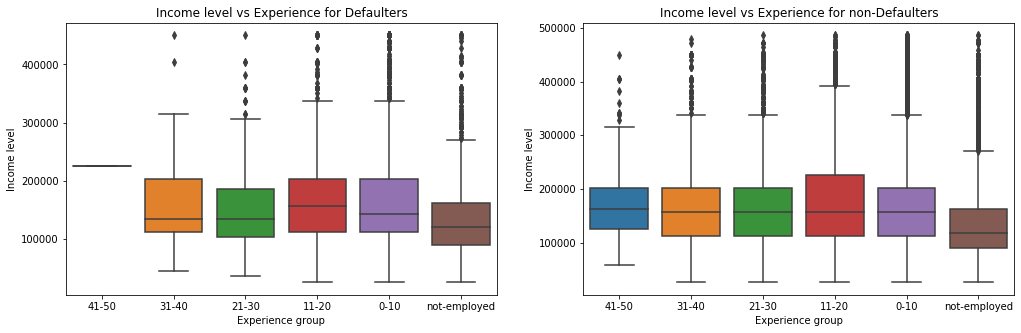

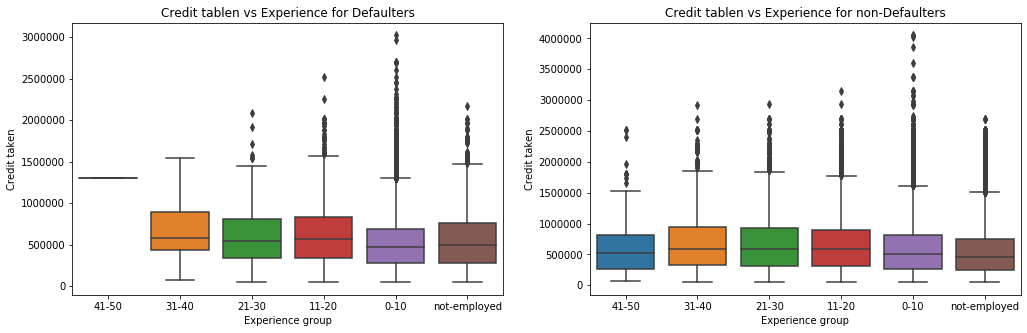

In [315]:
plt.figure(figsize = (17,5))
plt.subplot(1,2,1)
plt.title("Income level vs Experience for Defaulters")
chart = sns.boxplot(x="EXPERIENCE_LEVEL", y="AMT_INCOME_TOTAL", data=df1)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.xlabel("Experience group")
plt.ylabel("Income level")
plt.subplot(1,2,2)
plt.title("Income level vs Experience for non-Defaulters")
chart = sns.boxplot(x="EXPERIENCE_LEVEL", y="AMT_INCOME_TOTAL", data=df0)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.xlabel("Experience group")
plt.ylabel("Income level")
plt.show()

plt.figure(figsize = (17,5))
plt.subplot(1,2,1)
plt.title("Credit tablen vs Experience for Defaulters")
chart = sns.boxplot(x="EXPERIENCE_LEVEL", y="AMT_CREDIT", data=df1)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.xlabel("Experience group")
plt.ylabel("Credit taken")
plt.subplot(1,2,2)
plt.title("Credit tablen vs Experience for non-Defaulters")
chart = sns.boxplot(x="EXPERIENCE_LEVEL", y="AMT_CREDIT", data=df0)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.xlabel("Experience group")
plt.ylabel("Credit taken")
plt.show()

#### Conclusion on the above bivariate analysis
    1) Defaulters with mostly high experience(>=30 yrs) and under lower salary brackets and hence unable to repay the loan
    2) The credit is provided to clients with high experience and low salary bracket and hence they are defaulting    

##### 3.5.3 Bivariate analysis on the Continuous Vs Continuous attributes
    AMT_INCOME_TOTAL Vs AMT_CREDIT

In [303]:
## dropping the few of the records that have high outliers in both the datasets
df1.drop((df1[df1.AMT_INCOME_TOTAL > df1.AMT_INCOME_TOTAL.quantile(0.99)].index), inplace=True)
df0.drop((df0[df0.AMT_INCOME_TOTAL > df0.AMT_INCOME_TOTAL.quantile(0.99)].index), inplace=True)

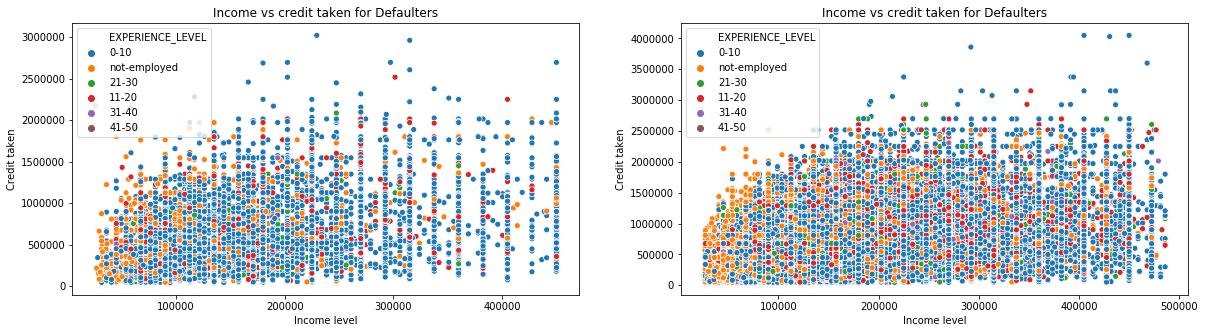

In [313]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Income vs credit taken for Defaulters")
chart = sns.scatterplot(x="AMT_INCOME_TOTAL", y="AMT_CREDIT", hue = "EXPERIENCE_LEVEL",data=df1)
plt.xlabel("Income level")
plt.ylabel("Credit taken")
plt.subplot(1,2,2)
plt.title("Income vs credit taken for Defaulters")
chart = sns.scatterplot(x="AMT_INCOME_TOTAL", y="AMT_CREDIT", hue = "EXPERIENCE_LEVEL", data=df0)
plt.xlabel("Income level")
plt.ylabel("Credit taken")
plt.show()

##### Conclusion:
    1) the defaulters are mostly the clients who have taken the credits that are for the income level upto of 2,50,000. 
    2) The non defaulters have good spread of Income level against the credit taken. Say for 300000 income client the credit taken is upto 15lakhs
    3) There is a good number of clients who are either retired or not-employed ( all these 2 categories are merged as not-employed as the DAYS_EMPLOYED = 365243 which is an impossible number for experience days) granted with credits having very low income. 

##### 3.5.4 Correlation between the data

###### 3.5.4.1 Target =1 

In [347]:
corr = df1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','REGION_POPULATION_RELATIVE']].corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df = corr_df.unstack().reset_index()
corr_df.columns = ['Var1','Var2','Correlation']
corr_df.dropna(subset = ['Correlation'], inplace =True)
corr_df['CORR_ABS'] = corr_df.Correlation.abs()
corr_df.sort_values('CORR_ABS',ascending=False,inplace =True)

In [348]:
corr_df[['Var1','Var2','CORR_ABS']].head(10)

,Var1,Var2,CORR_ABS
25,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
26,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
17,AMT_ANNUITY,AMT_CREDIT,0.752195
44,DAYS_EMPLOYED,DAYS_BIRTH,0.575097
52,DAYS_REGISTRATION,DAYS_BIRTH,0.289114
53,DAYS_REGISTRATION,DAYS_EMPLOYED,0.188929
35,DAYS_BIRTH,AMT_GOODS_PRICE,0.135810
33,DAYS_BIRTH,AMT_CREDIT,0.135316
42,DAYS_EMPLOYED,AMT_ANNUITY,0.082552
59,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,0.076049


##### Correlation Inference on Client with payment difficulties 
    1) There is a high correlation between the Goods price to the AMT_CREDIT as expected. 98.3% of the Goods price is financed through loan. Hence there is 98.3% correlation between AMT_GOODS_PRICE and AMT_CREDIT
    2) Next high correlated combination is Goods price to Annuity (EMI amount). This is also pretty much directly proportional to the loan amount taken. 
    3) There is very low correlation between the Income of the client to the Annuity amount. This ideally should have been good correlated attributes, as the Annuity amount should be in line iwth the income level. But here it is only 4% correlated. Which is why we can see the stress on the clients for repayment 
    4) Other important correlation is between the DAYS_EMPLOYED to INCOME of the client. The clients with higher experience have higher income (57.5% correlated)

###### 3.5.4.2 Target = 0

In [355]:
corr = df0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df = corr_df.unstack().reset_index()
corr_df.columns = ['Var1','Var2','Correlation']
corr_df.dropna(subset = ['Correlation'], inplace =True)
corr_df['CORR_ABS'] = corr_df.Correlation.abs()
corr_df.sort_values('CORR_ABS',ascending=False,inplace =True)

In [359]:
corr_df[['Var1','Var2','CORR_ABS']].head(10)

,Var1,Var2,CORR_ABS
25,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
26,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
17,AMT_ANNUITY,AMT_CREDIT,0.771309
44,DAYS_EMPLOYED,DAYS_BIRTH,0.618048
16,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
24,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462
8,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
52,DAYS_REGISTRATION,DAYS_BIRTH,0.333151
61,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.274290
60,DAYS_ID_PUBLISH,DAYS_BIRTH,0.271314


##### Correlation Inference on Client with NO payment difficulties 
    1) There is a high correlation between the Goods price to the AMT_CREDIT as expected. 98% of the Goods price is financed through loan. Hence there is 98.7% correlation between AMT_GOODS_PRICE and AMT_CREDIT
    2) Next high correlated combination is Goods price to Annuity (EMI amount). This is also pretty much directly proportional to the loan amount taken. 
    3) Important thing to be noted here is the clients who do not have stress on the repayment are having good correlation on the Annuity amount to their Income. There is ~42% correlation on the Income of the client to the Annuity amount.This clearly shows why the clients with this category are not having issues in their repayment